# A/B Test for MuscleHub
***

Currently, when a MuscleHub(a local gym) visitor purchases a membership, they follow the following steps:

Take a fitness test with a personal trainer.
Fill out an application for the gym.
Send in their payment for their first month’s membership.
We want to test the following hypothesis: the fitness test intimidates some prospective members, so we set up an A/B test.

Visitors are randomly be assigned to one of two groups:

Group A is still asked to take a fitness test with a personal trainer.
Group B skips the fitness test and proceed directly to the application.
Our hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A. So that the null and alternate hypotheses are as follows:

Null Hypothesis = There will no difference between the visitors in Group A that purchase membership and the visitors in Group B that purchase membership.
Alternate Hypothesis = There will be more visitors in Group B that will purchase membership than visitors in Group A that will purchase membership.
The significance threshold we will set as the benchmark to either accept or fail to reject the null hypothesis will be:

𝛼 = 0.05

## Import the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create and examine the visits DataFrame
visits = pd.read_csv('visits.csv')
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
# Create and examine the fitness_tests DataFrame
fitness_tests = pd.read_csv('fitness_tests.csv')
fitness_tests.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [4]:
# Create and examine the applications DataFrame
applications = pd.read_csv('applications.csv')
applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [5]:
# Create and examine the purchases DataFrame
purchases = pd.read_csv('purchases.csv')
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


## Join data

It would be helpful to have a single DataFrame with all of this data. 

Created a DataFrame containing all of this data where `visit_date` is on or after 7-1-17.


We'll need the following columns:

* `visits.first_name`
* `visits.last_name`
* `visits.gender`
* `visits.email`
* `visits.visit_date`
* `fitness_tests.fitness_test_date`
* `applications.application_date`
* `purchases.purchase_date`

In [6]:
# Create a new visits DataFrame based on date
visits = visits[visits['visit_date'] >= '7-1-17']
# View shape of new DataFrame
visits.shape

(5000, 5)

In [7]:
# Merge all four DataFrames
df = visits.merge(fitness_tests,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    applications,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    purchases,on=['first_name', 'last_name', 'email', 'gender'], how='left')

# Examine the new DataFrame
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


In [8]:
# Check the shape of the DataFrame
df.shape

(5004, 8)

## Visualize the Groups

Having compiled the DataFrame we can use to begin our project.

visualization that depicts the distribution of potential customers that were given a fitness test and those that were not:
- Create a bar plot of the test group variable's distribution.
- Create a pie cart using `plt.pie()`.

To conduct the A/B test we need to determine which customers were given a fitness test. We'll use the variable containing fitness test dates to create a new variable with values of `A` if the fitness test date variable is not `None`, and `B` if the fitness test date variable is `None`.

In [9]:
# Create new ab_test_group variable
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:
                                                'A' if pd.notnull(x) else 'B')

Now we'll do a quick sanity check to ensure that we split the visitors such that about half are in A and half are in B.

In [10]:
# Obtain value counts of each group
df['ab_test_group'].value_counts()

A    2504
B    2500
Name: ab_test_group, dtype: int64

In [11]:
# Obtain percentages of each group
df['ab_test_group'].value_counts(normalize=True)

A    0.5004
B    0.4996
Name: ab_test_group, dtype: float64

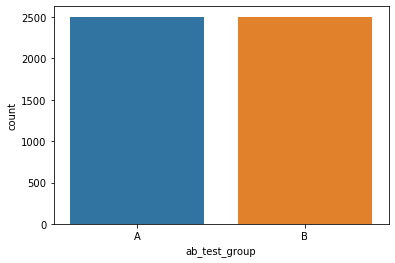

In [12]:
# Create a barplot of test group
sns.countplot(x="ab_test_group", data=df)

A pie chart might also be useful for this distribution

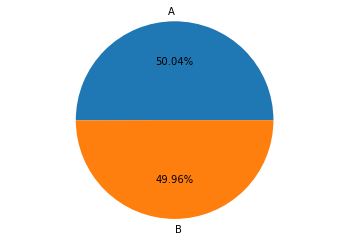

In [13]:
# Create a pie chart of test group
plt.pie(df['ab_test_group'].value_counts(), labels=['A', 'B'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()

## Determine the count of applications

The sign-up process for MuscleHub has several steps:

1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

Determine the percentage of people in each group who complete Step 2, filling out an application.

In [14]:
# Create is_application variable
df['is_application'] = df.application_date.apply(lambda x: 'Application'
                                                  if pd.notnull(x) else 'No Application')

Now we'll group by `is_application` and `ab_test_group` to count how many people from Group A and Group B either do or don't pick up an application.

We'll save this result as a new pandas DataFrame called `app_counts`.

In [15]:
# Create new app_counts DataFrame
app_counts = df.groupby(['ab_test_group', 'is_application'])\
               .first_name.count().reset_index()

Next, we'll calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot the new DataFrame such that:

- The `index` is `ab_test_group`
- The `columns` are `is_application`

After pivoting, we'll save it to the variable `app_pivot`. 

In [16]:
# Pivot app_counts DataFrame
app_pivot = app_counts.pivot(columns='is_application',
                            index='ab_test_group',
                            values='first_name')\
            .reset_index()

# View app_pivot
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


Next, we'll define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [17]:
# Create the total variable
app_pivot['Total'] = app_pivot.Application + app_pivot['No Application']

Finally, we'll calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [18]:
# Create the percent with application variable
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application.

We need to know if this difference is statistically significant.

## Calculate the statistical significance of applications

Having calculated the difference in who turned in an application between groups, we need to determine if this difference is statistically significant.

In [19]:
# Import hypothesis test module
from scipy.stats import chi2_contingency

# Calculate the p-value
contingency = [[250, 2254], [325, 2175]]
chi2_contingency(contingency)

(10.893961295282612,
 0.0009647827600722304,
 1,
 array([[ 287.72981615, 2216.27018385],
        [ 287.27018385, 2212.72981615]]))

A p-value of 0.00096 relative to a significance threshold of 0.05 indicates that there is a statistically signifant difference between the two groups.

## Detemine the count of memberships from applications

Determine how many potential customers purchased a membership out of those that picked up an application.

In [20]:
# Create an is_member variable
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')

Now, we'll create a DataFrame called `just_apps` that contains only people who picked up an application.

In [21]:
# Create the just_apps DataFrame
just_apps = df[df.is_application == 'Application']

Next, we'll do a `.groupby()` to find out how many people in `just_apps` are and aren't members from each group. 

In [22]:
# Create member_count DataFrame
member_count = just_apps.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()

# Pivot member_count
member_pivot = member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

# Create the Total variable
member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']

# Create the Percent Purchase variable
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. But we need to see if the result is statistically significant

## Calculate the statistical significance of memberships

Calculate if the difference between the following groups is statistically significant: 
- The customers that picked up an application and took a fitness test.
- The customers that did not take a fitness test and picked up an application.

In [23]:
# Calculate the p-value
contingency = [[200, 50], [250, 75]]
chi2_contingency(contingency)

(0.615869230769231,
 0.43258646051083327,
 1,
 array([[195.65217391,  54.34782609],
        [254.34782609,  70.65217391]]))

A p-value of 0.432 relative to a significance threshold of 0.05 does not refelct a statistically significant difference between the two groups, and would lead us to fail to reject the null hypothesis.

## Detemine the count of all memberships

In [24]:
# Create final_member_count DataFrame
final_member_count = df.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
# Pivot final_member_count
final_member_pivot = final_member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

# Create the Total variable
final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']

# Create the Percent Purchase variable
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Previously, when we only considered people who had already picked up an application, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who visit MuscleHub, we see that there might be a significant difference in memberships between Group A and Group B.

## Calculate the statistical significance between groups

Determine if there is a significant difference in memberships between Group A and Group B.

In [25]:
# Calculate the p-value
contingency = [[200, 2304], [250, 2250]]
chi2_contingency(contingency)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

A p-value of 0.0147 relative to a significance threshold of 0.05 indicates that there is a statistically signifant difference between the two groups. This informs us that we should not reject our initial hypothesis that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A.

However, it is important to note that when assessing the groups among those customers that filled out an application, those that completed a fitness test (Group A), were more likely to make a purchase than those customers that did not complete a fitness test (Group B).

## Visualize the results

Create visualizations that show the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply.
- Percent of applicants who purchase a membership.
- Percent of visitors who purchase a membership.

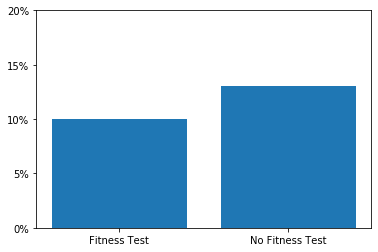

In [26]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
# plt.savefig('percent_visitors_apply.png')

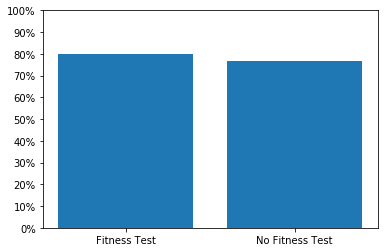

In [27]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
# plt.savefig('percent_apply_purchase.png')

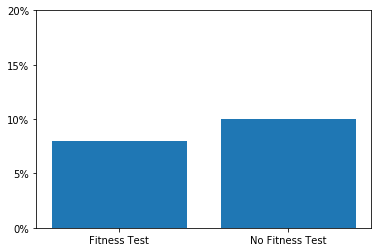

In [28]:
# Percent of Visitors who Purchase
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(final_member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
# plt.savefig('percent_visitors_purchase.png')

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

emails = fetch_20newsgroups()

In [5]:
emails.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
emails = fetch_20newsgroups(categories = ['rec.sport.baseball', 'rec.sport.hockey'])

In [7]:
print(emails.data[5])

From: mmb@lamar.ColoState.EDU (Michael Burger)
Subject: More TV Info
Distribution: na
Nntp-Posting-Host: lamar.acns.colostate.edu
Organization: Colorado State University, Fort Collins, CO  80523
Lines: 36

United States Coverage:
Sunday April 18
  N.J./N.Y.I. at Pittsburgh - 1:00 EDT to Eastern Time Zone
  ABC - Gary Thorne and Bill Clement

  St. Louis at Chicago - 12:00 CDT and 11:00 MDT - to Central/Mountain Zones
  ABC - Mike Emerick and Jim Schoenfeld

  Los Angeles at Calgary - 12:00 PDT and 11:00 ADT - to Pacific/Alaskan Zones
  ABC - Al Michaels and John Davidson

Tuesday, April 20
  N.J./N.Y.I. at Pittsburgh - 7:30 EDT Nationwide
  ESPN - Gary Thorne and Bill Clement

Thursday, April 22 and Saturday April 24
  To Be Announced - 7:30 EDT Nationwide
  ESPN - To Be Announced


Canadian Coverage:

Sunday, April 18
  Buffalo at Boston - 7:30 EDT Nationwide
  TSN - ???

Tuesday, April 20
  N.J.D./N.Y. at Pittsburgh - 7:30 EDT Nationwide
  TSN - ???

Wednesday, April 21
  St. Louis a